# <center> <a id="2"> 📚 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# <center><a id="3"> 📖 Read Dataset

In [2]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')

In [3]:
train_df.columns,test_df.columns,len(test_df)

(Index(['Id', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Company'],
       dtype='object'),
 Index(['Id', 'Date', 'Company'], dtype='object'),
 576)

# <center> <a id="4"> Missing Values

In [4]:
train_df.isnull().astype('int').sum()

Id           0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

# <center> <a id="5">EDA

**Open: The opening price is the price at which a particular stock begins trading on a given day. It is the first transaction price of the day for a particular stock.**

**High: The high price represents the highest trading price of a stock during a specific time period, typically within a day. It indicates the peak value reached by the stock during that period.**

**Low: The low price is the opposite of the high price, signifying the lowest trading price of a stock within a given time frame. It represents the minimum value reached by the stock during that period.**

**Volume: Trading volume refers to the total number of shares of a stock traded within a specific time period, usually a day. It indicates the level of market activity and liquidity for a particular stock. Higher volume often suggests increased interest and liquidity, while lower volume may indicate less interest or market volatility.**

**Close: The closing price is the last transaction price of a stock at the end of a trading day. It is considered a crucial indicator as it reflects the final value at which a stock was traded for the day. This is what you will be predicting in this competition.**

**Adjusted Close: The adjusted close price accounts for factors such as dividends, stock splits, and other corporate actions that may impact the stock price.**

In [5]:
train_df.describe()

,Id,Open,High,Low,Close,Adj Close,Volume
count,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000,7.416000e+03
mean,3707.500000,1322.970742,1338.768595,1305.328823,1321.298741,1280.440414,3.975197e+07
std,2140.959131,2777.109807,2808.083803,2742.046008,2773.452166,2698.389268,1.102362e+08
min,0.000000,2.564008,2.507671,2.407399,2.358517,2.527507,1.277000e+03
25%,1853.750000,56.270001,57.199683,55.096529,55.836524,50.836902,1.034437e+06
50%,3707.500000,109.799270,111.421736,107.923378,109.613059,91.488025,6.081018e+06
75%,5561.250000,164.955953,167.238755,163.383748,165.097484,158.495970,2.029659e+07
max,7415.000000,9853.304141,9929.409504,9724.918827,9832.117608,9438.189612,1.073742e+09


In [15]:
train_df[train_df["Company"] == "Company_0"]

,Id,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,0,2033-03-01,159.271109,167.221488,157.380478,161.915062,160.167043,40490589,Company_0
6,6,2033-03-05,158.049337,167.347904,152.216604,163.108507,162.822481,38792259,Company_0
12,12,2033-03-06,163.686732,167.057890,158.434401,161.716298,161.443814,30423475,Company_0
18,18,2033-03-07,160.461622,161.422258,145.216158,148.051907,147.522450,36866132,Company_0
24,24,2033-03-08,150.289989,154.889808,146.911183,148.483368,147.558481,20664624,Company_0
...,...,...,...,...,...,...,...,...,...
7386,7386,2038-02-22,276.292107,280.003128,271.368847,273.183503,273.187495,403951,Company_0
7392,7392,2038-02-23,275.052974,279.450461,269.396522,273.416583,272.320602,554863,Company_0
7398,7398,2038-02-24,274.586866,276.778935,269.655064,270.560046,269.952122,270103,Company_0
7404,7404,2038-02-27,270.691651,273.296639,262.006661,265.683943,264.539295,591691,Company_0


In [6]:
train_df_0=train_df[train_df['Company'] == 'Company_0']
train_df_1=train_df[train_df['Company'] == 'Company_1']
train_df_2=train_df[train_df['Company'] == 'Company_2']
train_df_3=train_df[train_df['Company'] == 'Company_3']
train_df_4=train_df[train_df['Company'] == 'Company_4']
train_df_5=train_df[train_df['Company'] == 'Company_5']

test_df_0=test_df[test_df['Company'] == 'Company_0']
test_df_1=test_df[test_df['Company'] == 'Company_1']
test_df_2=test_df[test_df['Company'] == 'Company_2']
test_df_3=test_df[test_df['Company'] == 'Company_3']
test_df_4=test_df[test_df['Company'] == 'Company_4']
test_df_5=test_df[test_df['Company'] == 'Company_5']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

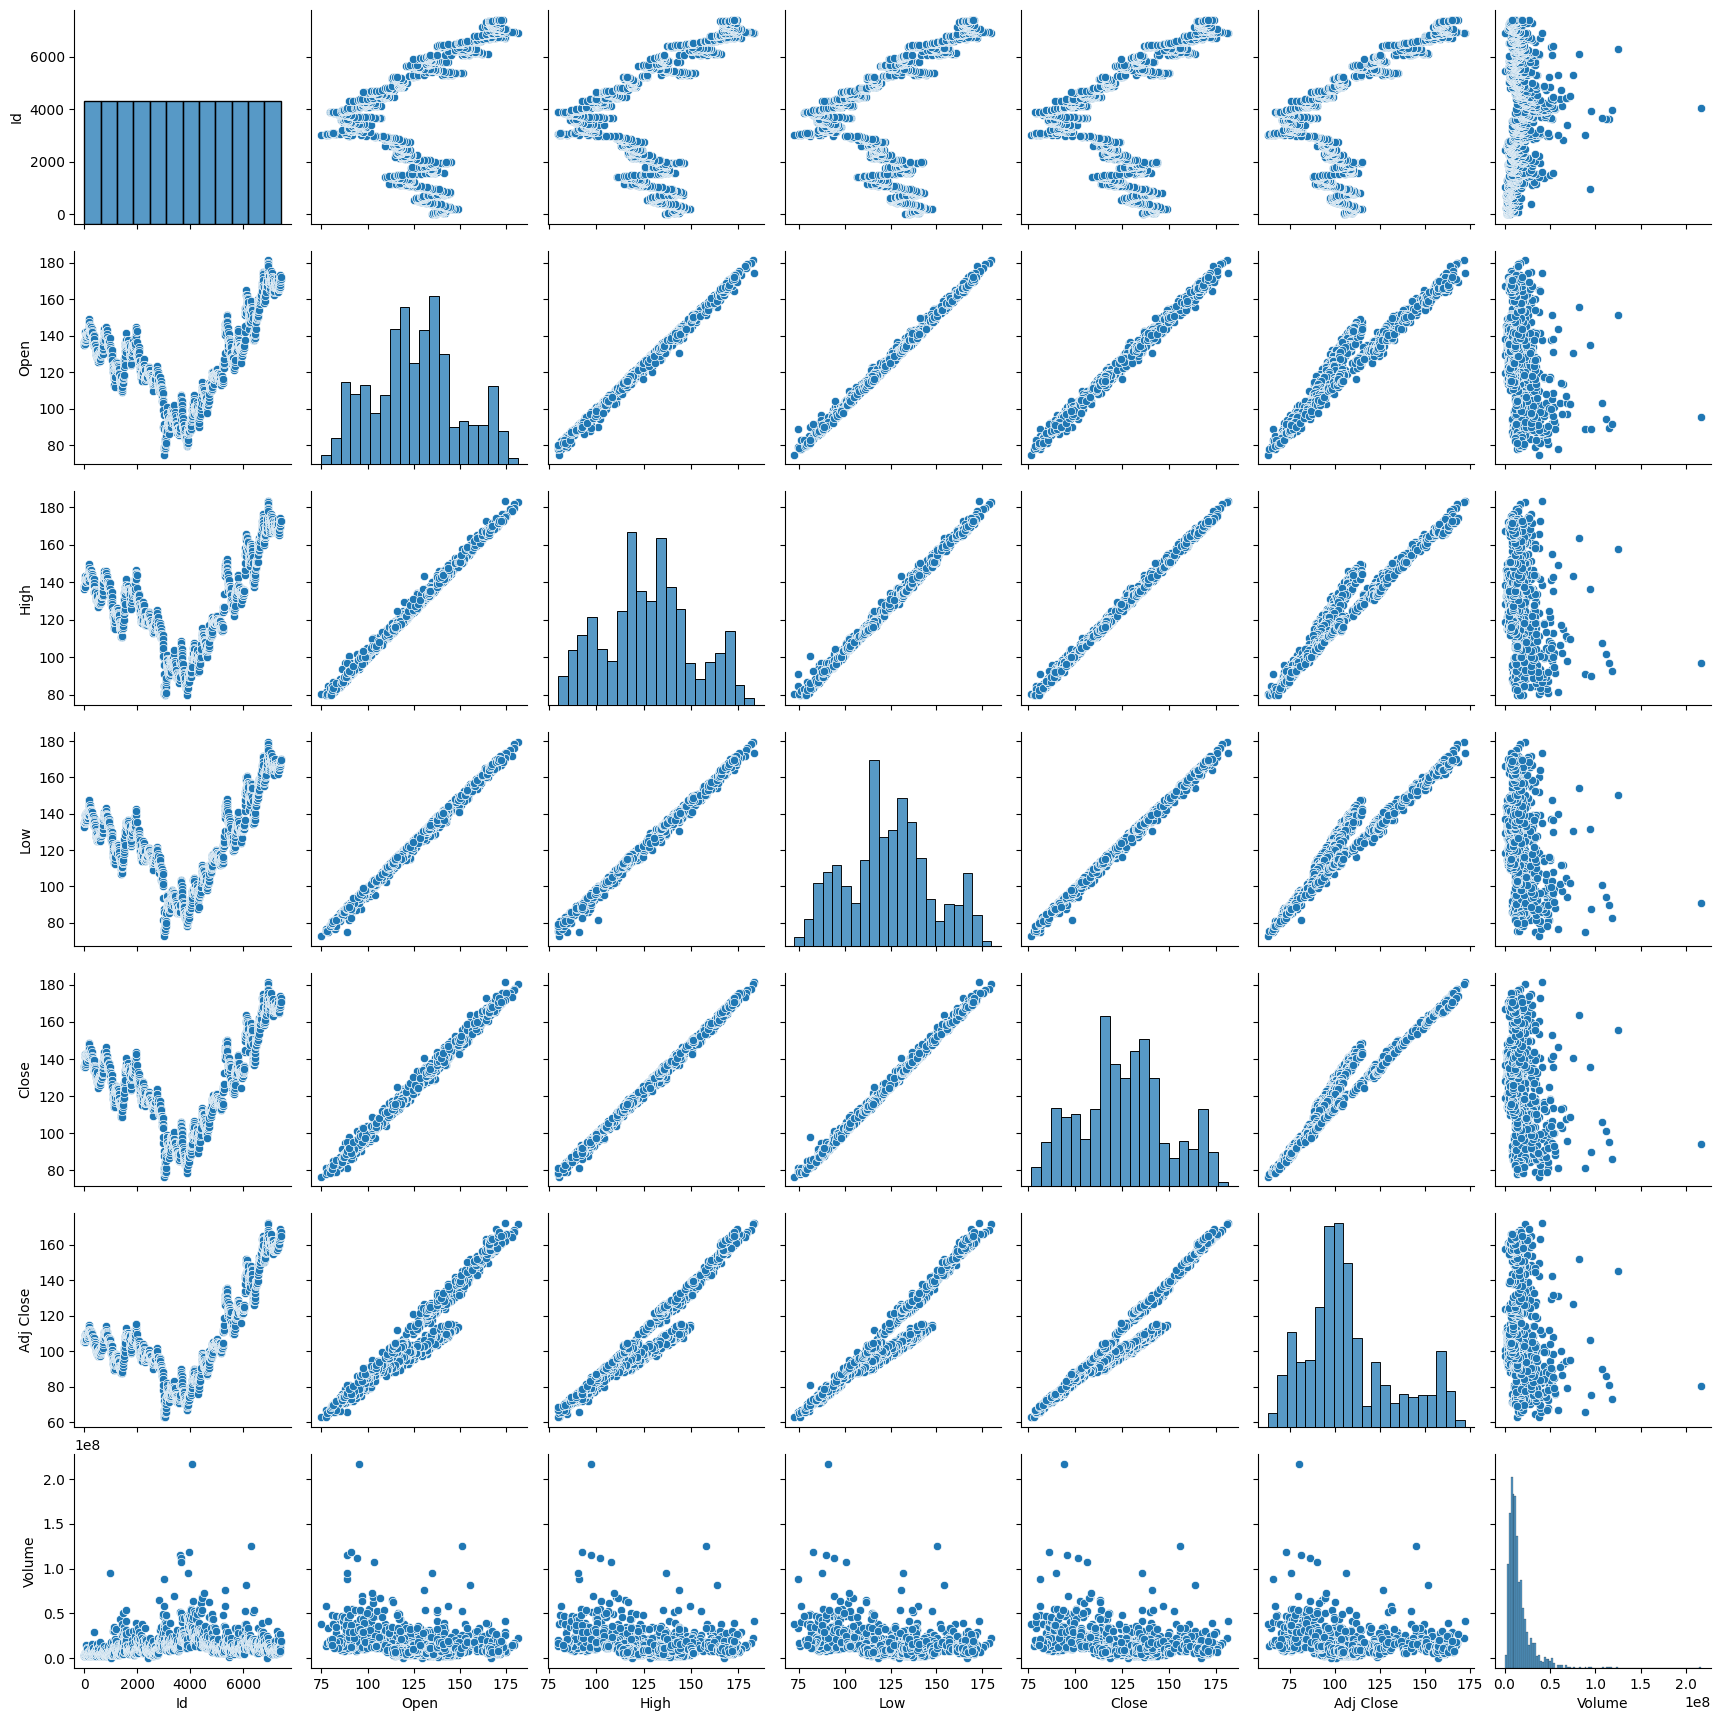

In [7]:
sns.pairplot(train_df_5)

In [8]:
#linear rescale
def rescale(df):
    train_df=df.copy()
    
    train_df['Open']-=train_df['Open'].mean()
    train_df['High']-=train_df['High'].mean()
    train_df['Low'] -=train_df['Low'].mean()
    #train_df['Volume']-=train_df['Volume'].mean()
    train_df['Close']-=train_df['Close'].mean()
    train_df['Adj Close']-=train_df['Adj Close'].mean()

    train_df['Open']/=train_df['Open'].std()
    train_df['High']/=train_df['High'].std()
    train_df['Low'] /=train_df['Low'].std()
    train_df['Volume']/=train_df['Volume'].mean()
    train_df['Close']/=train_df['Close'].std()
    train_df['Adj Close']/=train_df['Adj Close'].std()
    
    return train_df

In [9]:
rescaled_train_df_0=rescale(train_df_0)
rescaled_train_df_1=rescale(train_df_1)
rescaled_train_df_2=rescale(train_df_2)
rescaled_train_df_3=rescale(train_df_3)
rescaled_train_df_4=rescale(train_df_4)
rescaled_train_df_5=rescale(train_df_5)

In [10]:
rescaled_train_df_5[-100:-1].describe()


,Id,Open,High,Low,Close,Adj Close,Volume
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,7115.000000,1.853899,1.840458,1.852257,1.848720,2.103711,0.701896
std,172.336879,0.161953,0.163057,0.154184,0.156831,0.145025,0.363825
min,6821.000000,1.547073,1.593925,1.564497,1.513587,1.779551,0.042437
25%,6968.000000,1.741257,1.714943,1.741281,1.724390,1.987056,0.476901
50%,7115.000000,1.847458,1.815916,1.835613,1.826671,2.097634,0.597859
75%,7262.000000,1.933833,1.937572,1.945198,1.951287,2.185348,0.803045
max,7409.000000,2.379838,2.391540,2.389748,2.378153,2.568743,2.545653
